# <font color='blue'> Case study : predict the GDP and annual GDP growth of Tunisia.</font>  

##  Part 1: <font color='red'> Data collection </font> 

### 1) Import the required libraries and load the dataset :

In [1164]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from math import sqrt

source of the dataset :

    1-FRED : (every economist's best friend )  : 
    https://fred.stlouisfed.org/series/MKTGDPTNA646NWDB 
    2-The world Bank : 
    https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=TN

### <font color='blue'> First dataset  : GDP-Tunisia </font>  

In [1165]:
GDP_Data=pd.read_csv('GDP-Tunisia.csv')

In [1166]:
GDP_Data.shape

(54, 2)

In [1167]:
GDP_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DATE                                54 non-null     object 
 1   GDP Tunisia (Current U.S. Dollars)  54 non-null     float64
dtypes: float64(1), object(1)
memory usage: 992.0+ bytes


#### Convert the column 'DATE' from 'object' to 'datetime64' in order to use it in further analysis : 

In [1168]:
GDP_Data['DATE']=pd.to_datetime(GDP_Data['DATE'])

#### Change the name of our target variable from 'MKTGDPTNA646NWDB' to 'GDP Tunisia (Current U.S. Dollars)'   : 

In [1169]:
GDP_Data.rename(columns = {'MKTGDPTNA646NWDB':'GDP Tunisia (Current U.S. Dollars)'}, inplace = True) 

In [1170]:
GDP_Data.tail(20)

DATE  GDP Tunisia (Current U.S. Dollars)
34 2000-01-01                        2.147319e+10
35 2001-01-01                        2.206610e+10
36 2002-01-01                        2.314229e+10
37 2003-01-01                        2.745308e+10
38 2004-01-01                        3.118314e+10
39 2005-01-01                        3.227301e+10
40 2006-01-01                        3.437844e+10
41 2007-01-01                        3.890807e+10
42 2008-01-01                        4.485659e+10
43 2009-01-01                        4.345494e+10
44 2010-01-01                        4.405093e+10
45 2011-01-01                        4.581063e+10
46 2012-01-01                        4.504411e+10
47 2013-01-01                        4.625106e+10
48 2014-01-01                        4.763233e+10
49 2015-01-01                        4.317348e+10
50 2016-01-01                        4.180121e+10
51 2017-01-01                        3.980243e+10
52 2018-01-01                        3.977030e+10
53 2019-01-01                        3.879669e+10

###  <font color='blue'> Second dataset  : GDPGrowth-Tunisia </font>  

In [1171]:
GDP_Growth=pd.read_csv('GDPGrowth-Tunisia.csv',sep=',')

In [1172]:
GDP_Growth.shape

(54, 2)

In [1173]:
GDP_Growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                54 non-null     object 
 1   GDP Growth annual%  54 non-null     float64
dtypes: float64(1), object(1)
memory usage: 992.0+ bytes


In [1174]:
GDP_Growth['DATE']=pd.to_datetime(GDP_Growth['DATE'])

In [1175]:
GDP_Growth.head(10)

DATE  GDP Growth annual%
0 1966-01-01                 3.5
1 1967-01-01                 0.2
2 1968-01-01                10.4
3 1969-01-01                 4.7
4 1970-01-01                 4.7
5 1971-01-01                10.6
6 1972-01-01                17.7
7 1973-01-01                -0.7
8 1974-01-01                 8.1
9 1975-01-01                 7.2

#### Merge the two datasets : 

In [1176]:
dataset=pd.merge(GDP_Data,GDP_Growth,on='DATE')

In [1177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE                                54 non-null     datetime64[ns]
 1   GDP Tunisia (Current U.S. Dollars)  54 non-null     float64       
 2   GDP Growth annual%                  54 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.7 KB


In [1178]:
dataset.tail(10)

DATE  GDP Tunisia (Current U.S. Dollars)  GDP Growth annual%
44 2010-01-01                        4.405093e+10                 3.5
45 2011-01-01                        4.581063e+10                -1.9
46 2012-01-01                        4.504411e+10                 4.0
47 2013-01-01                        4.625106e+10                 2.9
48 2014-01-01                        4.763233e+10                 3.0
49 2015-01-01                        4.317348e+10                 1.2
50 2016-01-01                        4.180121e+10                 1.2
51 2017-01-01                        3.980243e+10                 1.9
52 2018-01-01                        3.977030e+10                 2.7
53 2019-01-01                        3.879669e+10                 1.0

### 2) Statical analysis of the data :

In [1179]:
dataset_indexed=dataset[['DATE','GDP Tunisia (Current U.S. Dollars)']].set_index(['DATE'])

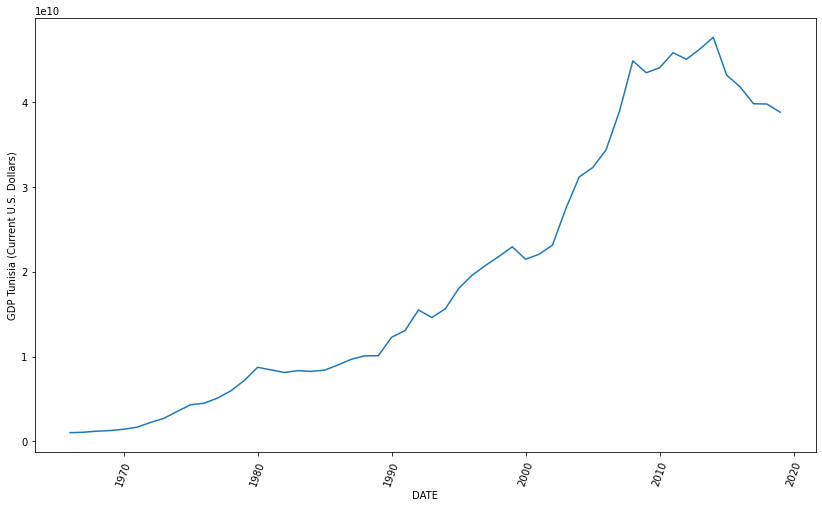

In [1180]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=70)
plt.xlabel("DATE")
plt.ylabel("GDP Tunisia (Current U.S. Dollars)")
plt.plot(dataset_indexed)

 #### ⟹<font color='red'>  GDP throughout the period under review, has seen a steady growth from one year to another , making an exception to this rule in 2014 when it start decreasing from 47.6 Billion USD to reach 38.7 Billion USD in 2019</font>   

### 3) Add alternative data to strengthen our analysis and our predictive model 

#### To predict the GDP we need to add some alternative data : other features may have an impact on our target variable : 
  #### - Unemployment rate 
  #### - Inflation, consumer prices for Tunisia  (CPI)
  #### - Population  : all residents regardless of legal status or citizenship 

#### Load the dataset of unemployment rate in tunisia :  

source of the dataset :
    - statista : 
        https://www.statista.com/statistics/524516/unemployment-rate-in-tunisia/

In [1181]:
UnemploymentRate = pd.read_excel('unemployment-rate-in-tunisia.xlsx', sheet_name='Data')

In [1182]:
UnemploymentRate.drop(['Unnamed: 0','Unnamed: 3'],axis=1,inplace=True)

#### Change the name of our features from 'Unnamed: 1' to 'DATE' and 'Unnamed: 2' to 'unemployment rate'   : 

In [1183]:
UnemploymentRate.rename(columns = {'Unnamed: 1':'DATE','Unnamed: 2':'unemployment rate'}, inplace = True) 

In [1184]:
UnemploymentRate.drop(labels=[0,1,2,3],inplace=True)

In [1185]:
UnemploymentRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 4 to 25
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               22 non-null     object 
 1   unemployment rate  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


In [1186]:
UnemploymentRate['DATE']=UnemploymentRate['DATE'].astype(str)+'-01-01'
UnemploymentRate['DATE']=pd.to_datetime(UnemploymentRate['DATE'])

#### Load the dataset of CPI :   

source of the dataset :
    - FRED : 
        https://fred.stlouisfed.org/series/FPCPITOTLZGTUN

In [1187]:
CPI_Tunisia=pd.read_csv('CPI.csv',sep=',') 

In [1188]:
CPI_Tunisia['DATE']=pd.to_datetime(CPI_Tunisia['DATE'])

#### Change the name of our target variable from 'FPCPITOTLZGTUN' to 'CPI'   : 

In [1189]:
CPI_Tunisia.rename(columns = {'FPCPITOTLZGTUN':'CPI'}, inplace = True) 

#### Load the dataset of Population in tunisia  :   

source of the dataset :
    - FRED : 
        https://fred.stlouisfed.org/series/POPTOTTNA647NWDB

In [1190]:
Population_Tunisia=pd.read_csv('Population.csv',sep=',') 

In [1191]:
Population_Tunisia['DATE']=pd.to_datetime(Population_Tunisia['DATE'])

In [1192]:
Population_Tunisia.rename(columns = {'POPTOTTNA647NWDB':'Population'}, inplace = True) 

#### Merge the alternative data with our dataset : 

In [1193]:
dataset=pd.merge(dataset,UnemploymentRate,on='DATE')

In [1194]:
dataset=pd.merge(dataset,CPI_Tunisia,on='DATE')

In [1195]:
dataset=pd.merge(dataset,Population_Tunisia,on='DATE')

#### set the date as index of our dataset : 

In [1196]:
dataset.set_index('DATE')

GDP Tunisia (Current U.S. Dollars)  GDP Growth annual%  \
DATE                                                                 
1999-01-01                        2.294369e+10                 6.1   
2000-01-01                        2.147319e+10                 4.7   
2001-01-01                        2.206610e+10                 3.8   
2002-01-01                        2.314229e+10                 1.3   
2003-01-01                        2.745308e+10                 4.7   
2004-01-01                        3.118314e+10                 6.2   
2005-01-01                        3.227301e+10                 3.5   
2006-01-01                        3.437844e+10                 5.2   
2007-01-01                        3.890807e+10                 6.7   
2008-01-01                        4.485659e+10                 4.2   
2009-01-01                        4.345494e+10                 3.0   
2010-01-01                        4.405093e+10                 3.5   
2011-01-01                        4.581063e+10                -1.9   
2012-01-01                        4.504411e+10                 4.0   
2013-01-01                        4.625106e+10                 2.9   
2014-01-01                        4.763233e+10                 3.0   
2015-01-01                        4.317348e+10                 1.2   
2016-01-01                        4.180121e+10                 1.2   
2017-01-01                        3.980243e+10                 1.9   
2018-01-01                        3.977030e+10                 2.7   
2019-01-01                        3.879669e+10                 1.0   

            unemployment rate       CPI  Population  
DATE                                                 
1999-01-01              15.21  2.690125     9613588  
2000-01-01              14.94  2.962308     9708350  
2001-01-01              14.40  1.983333     9793903  
2002-01-01              14.55  2.721033     9871251  
2003-01-01              14.51  2.712592     9945277  
2004-01-01              14.23  3.632280    10022277  
2005-01-01              12.87  2.017786    10106771  
2006-01-01              12.51  3.225253    10201214  
2007-01-01              12.37  2.966944    10304726  
2008-01-01              12.44  4.345028    10414433  
2009-01-01              13.29  3.664903    10525694  
2010-01-01              13.05  3.338980    10635244  
2011-01-01              18.33  3.240028    10741880  
2012-01-01              17.63  4.611844    10847002  
2013-01-01              15.93  5.316235    10952951  
2014-01-01              15.06  4.625551    11063201  
2015-01-01              15.22  4.437371    11179949  
2016-01-01              15.51  3.629399    11303946  
2017-01-01              15.38  5.308848    11433443  
2018-01-01              15.46  7.307592    11565204  
2019-01-01              16.02  6.720075    11694719

## Data visualization 

#### <font color='red'> the code below plot each series as separate subplot . </font>

In [1197]:
values=dataset.values

##### specify the columns to plot : 

In [1198]:
groups=[1,2,3,4,5]

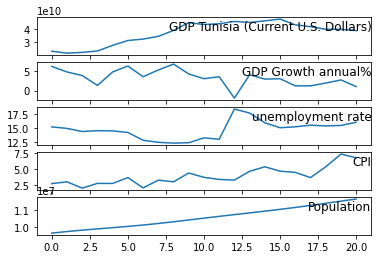

In [1199]:
i=1
plt.figure()
for group in groups : 
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(dataset.columns[group],y=0.5,loc='right')
    i +=1
plt.show()

##  Part 2: <font color='red'> Time Series analysis </font> 

### 1) A statistical tests to  check if our  data is stationary or not : 

####  - Dickey-Fuller test :  
#### H0 : non-stationary time series 
#### H1 : stationary time series 

In [1200]:
dataset_indexed = dataset.set_index(['DATE'])

In [1201]:
X = dataset_indexed[['GDP Tunisia (Current U.S. Dollars)']].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.263385
p-value: 0.184049
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


#### <font color='red'>  p-value: 0.184049 > 0.05 : we cannot reject the H0 ⟹ our data is not stationary </font>

### 2) Pre-processing algorithms : 

### A) As a first step of our Pre-processing part i set the column date as the index of our dataset  In some cases data can be provided with different date formats, so it is an obligation to interpret all these formats   : 

dataset_indexed = dataset.set_index(['DATE']) 


### B) Dealing with missing values : 
####  when i merged the datasets i encountred some missing values of some features due to lack of informations posted on the internet , so the best choice is to drop the rows where the missing values are present in order to get accurate data 


In [1202]:
dataset.isnull().any()

DATE                                  False
GDP Tunisia (Current U.S. Dollars)    False
GDP Growth annual%                    False
unemployment rate                     False
CPI                                   False
Population                            False
dtype: bool

### 3) predictive model of the GPD : 

### a ) split the raw data  : 

In [1203]:
X_train = dataset[dataset['DATE'] < '2012-01-01']
X_test = dataset[dataset['DATE'] >= '2012-01-01']

In [1204]:
X_train.shape

(13, 6)

In [1205]:
X_test

DATE  GDP Tunisia (Current U.S. Dollars)  GDP Growth annual%  \
13 2012-01-01                        4.504411e+10                 4.0   
14 2013-01-01                        4.625106e+10                 2.9   
15 2014-01-01                        4.763233e+10                 3.0   
16 2015-01-01                        4.317348e+10                 1.2   
17 2016-01-01                        4.180121e+10                 1.2   
18 2017-01-01                        3.980243e+10                 1.9   
19 2018-01-01                        3.977030e+10                 2.7   
20 2019-01-01                        3.879669e+10                 1.0   

    unemployment rate       CPI  Population  
13              17.63  4.611844    10847002  
14              15.93  5.316235    10952951  
15              15.06  4.625551    11063201  
16              15.22  4.437371    11179949  
17              15.51  3.629399    11303946  
18              15.38  5.308848    11433443  
19              15.46  7.307592    11565204  
20              16.02  6.720075    11694719

### b )  set the date as index of our dataframe : 

In [1206]:
au2 = X_train[['DATE', 'GDP Tunisia (Current U.S. Dollars)']]
au_v2  = X_test[['DATE', 'GDP Tunisia (Current U.S. Dollars)']]

In [1207]:
au2.set_index('DATE', inplace=True)
au_v2.set_index('DATE', inplace=True)

In [1208]:
index_7_years = pd.date_range(au2.index[-1], freq='AS', periods = 8) 

index_7_years

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

C:\Users\chihe\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\chihe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

The MSE of ARIMA is: 1954808752.5005078


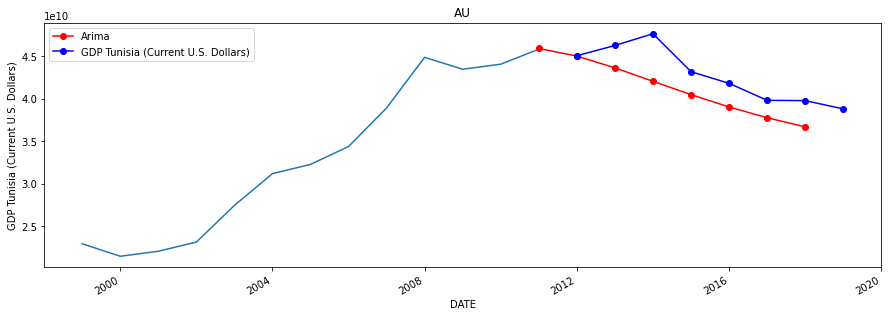

In [1209]:
model_arima = ARIMA(au2, order=(2,0,0)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)
fcast1 = model_arima_fit.forecast(8)[0]
fcast1 = pd.Series(fcast1, index=index_7_years)
fcast1 = fcast1.rename("Arima")
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='DATE', y='GDP Tunisia (Current U.S. Dollars)', data =X_train)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
au_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(X_test['GDP Tunisia (Current U.S. Dollars)'].values, fcast1.values, squared=False))

#### In artificial neural network , there is a class called recurrent neural network (RNN) where connections between nodes form a directed graph along a temporal sequence . So i will try to build an rnn to predicit GDP and GDP growth 

##  Part 3: <font color='red'> Deep Learning modeling </font> 

### 1) Deep learning architecture : Multivariate LSTM Forecast Model  

#### a ) LSTM Data Preparation : 


This involves framing the dataset as a supervised learning problem and normalizing the input variables.
We will frame the supervised learning problem as predicting the GDP and GDP growth at the current year (t) given the GDP measurements and GDP growth at the prior time step. 

##### ensure all data are float  : 

In [1210]:
values=np.delete(values,0,1)

In [1211]:
values=values.astype('float32')

##### normalize features : 

In [1212]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler (feature_range=(0,1))

In [1213]:
values_scaled=sc.fit_transform(values)

##### convert series to supervised learning : 

In [1214]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [1215]:
values_reframed = series_to_supervised(values_scaled, 1, 1)

##### drop columns we don't want to predict

In [1216]:
values_reframed.drop(values_reframed.columns[[7,8,9]], axis=1, inplace=True)

#### split into train and test sets

In [1217]:
values_reframed[16:-1]

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)
17   0.829549   0.360465   0.478188   0.460916   0.752649  0.777091  0.360465
18   0.777091   0.360465   0.526845   0.309163   0.812231  0.700682  0.441860
19   0.700682   0.441860   0.505033   0.624597   0.874455  0.699454  0.534884

In [1218]:
X_train,y_train=values_reframed[0:16].drop(['var1(t)','var2(t)'],axis=1),values_reframed[0:16]['var1(t)']

In [1219]:
X_test,y_test=values_reframed[16:-1].drop(['var1(t)','var2(t)'],axis=1),values_reframed[16:-1]['var1(t)']

In [1220]:
y_train_GdpGrowth,y_test_GdpGrowth=values_reframed[0:16]['var2(t)'],values_reframed[16:-1]['var2(t)']

In [1221]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values
y_train_GdpGrowth=y_train_GdpGrowth.values
y_test_GdpGrowth=y_test_GdpGrowth.values

#### reshape input to be 3D [samples, timesteps, features]


In [1222]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#### design network : 

In [1223]:
from keras.layers import LSTM


In [1224]:
GDP = Sequential()
GDP.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
GDP.add(Dense(1))
GDP.compile(loss='mae', optimizer='adam')

In [1225]:
history_Gdp=GDP.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 16 samples, validate on 3 samples
Epoch 1/100
 - 2s - loss: 0.5570 - val_loss: 0.6462
Epoch 2/100
 - 0s - loss: 0.5296 - val_loss: 0.6082
Epoch 3/100
 - 0s - loss: 0.5047 - val_loss: 0.5699
Epoch 4/100
 - 0s - loss: 0.4797 - val_loss: 0.5312
Epoch 5/100
 - 0s - loss: 0.4574 - val_loss: 0.4934
Epoch 6/100
 - 0s - loss: 0.4357 - val_loss: 0.4556
Epoch 7/100
 - 0s - loss: 0.4139 - val_loss: 0.4173
Epoch 8/100
 - 0s - loss: 0.3918 - val_loss: 0.3782
Epoch 9/100
 - 0s - loss: 0.3690 - val_loss: 0.3379
Epoch 10/100
 - 0s - loss: 0.3455 - val_loss: 0.2961
Epoch 11/100
 - 0s - loss: 0.3211 - val_loss: 0.2525
Epoch 12/100
 - 0s - loss: 0.2971 - val_loss: 0.2091
Epoch 13/100
 - 0s - loss: 0.2747 - val_loss: 0.1650
Epoch 14/100
 - 0s - loss: 0.2540 - val_loss: 0.1217
Epoch 15/100
 - 0s - loss: 0.2368 - val_loss: 0.0808
Epoch 16/100
 - 0s - loss: 0.2227 - val_loss: 0.0587
Epoch 17/100
 - 0s - loss: 0.2086 - val_loss: 0.0472
Epoch 18/100
 - 0s - loss: 0.1944 - val_loss: 0.0491
Epoch 19/100

In [1226]:
GDP_Growth = Sequential()
GDP_Growth.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
GDP_Growth.add(Dense(1))
GDP_Growth.compile(loss='mae', optimizer='adam')

In [1227]:
history_GdpGrowth=GDP_Growth.fit(X_train, y_train_GdpGrowth, epochs=100, batch_size=4, validation_data=(X_test, y_test_GdpGrowth), verbose=2, shuffle=False)

Train on 16 samples, validate on 3 samples
Epoch 1/100
 - 2s - loss: 0.6358 - val_loss: 0.4162
Epoch 2/100
 - 0s - loss: 0.6036 - val_loss: 0.3722
Epoch 3/100
 - 0s - loss: 0.5715 - val_loss: 0.3275
Epoch 4/100
 - 0s - loss: 0.5389 - val_loss: 0.2821
Epoch 5/100
 - 0s - loss: 0.5057 - val_loss: 0.2357
Epoch 6/100
 - 0s - loss: 0.4718 - val_loss: 0.1878
Epoch 7/100
 - 0s - loss: 0.4367 - val_loss: 0.1384
Epoch 8/100
 - 0s - loss: 0.4028 - val_loss: 0.0884
Epoch 9/100
 - 0s - loss: 0.3736 - val_loss: 0.0677
Epoch 10/100
 - 0s - loss: 0.3441 - val_loss: 0.0571
Epoch 11/100
 - 0s - loss: 0.3161 - val_loss: 0.0724
Epoch 12/100
 - 0s - loss: 0.2977 - val_loss: 0.1100
Epoch 13/100
 - 0s - loss: 0.2830 - val_loss: 0.1493
Epoch 14/100
 - 0s - loss: 0.2695 - val_loss: 0.1838
Epoch 15/100
 - 0s - loss: 0.2589 - val_loss: 0.2127
Epoch 16/100
 - 0s - loss: 0.2517 - val_loss: 0.2340
Epoch 17/100
 - 0s - loss: 0.2468 - val_loss: 0.2502
Epoch 18/100
 - 0s - loss: 0.2422 - val_loss: 0.2602
Epoch 19/100

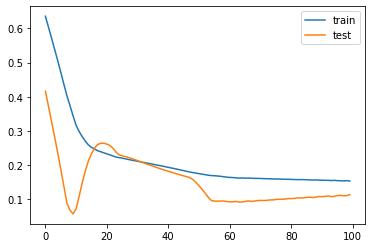

In [1228]:
plt.plot(history_GdpGrowth.history['loss'], label='train')
plt.plot(history_GdpGrowth.history['val_loss'], label='test')
plt.legend()
plt.show()

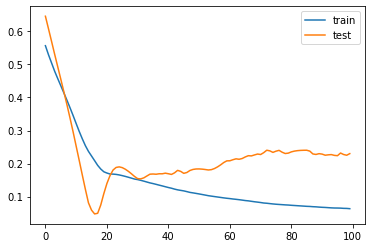

In [1229]:
plt.plot(history_Gdp.history['loss'], label='train')
plt.plot(history_Gdp.history['val_loss'], label='test')
plt.legend()
plt.show()

### GDP  : 

In [1230]:
y_GDP = GDP.predict(X_test)

In [1231]:
y_GDPGrowth=GDP_Growth.predict(X_test)

In [1232]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [1233]:
inv_y_GDP = concatenate((y_GDP, X_test[:, 1:]), axis=1)

In [1234]:
inv_y_GDPGrowth=concatenate((y_GDPGrowth, X_test[:, 1:]), axis=1)

In [1235]:
inv_y_GDP = sc.inverse_transform(inv_y_GDP)

In [1236]:
inv_y_GDP = inv_y_GDP[:,0]

In [1237]:
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = sc.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [1238]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4566199703.802


### GDP Growth : 

#### invert scaling for forecast

In [1239]:
inv_GDPGrowth = concatenate((y_GDPGrowth, X_test[:, 1:]), axis=1)

In [1240]:
inv_GDPGrowth=sc.inverse_transform(inv_GDPGrowth)

In [1241]:
inv_GDPGrowth=inv_GDPGrowth[:,0]

In [1242]:
y_test_GdpGrowth = y_test_GdpGrowth.reshape((len(y_test_GdpGrowth), 1))
inv_yh_GDPGrowth = concatenate((y_test_GdpGrowth, X_test[:, 1:]), axis=1)
inv_yh_GDPGrowth = sc.inverse_transform(inv_yh_GDPGrowth)
inv_yh_GDPGrowth = inv_yh_GDPGrowth[:,0]

In [1243]:
rmse = sqrt(mean_squared_error(inv_yh_GDPGrowth, inv_GDPGrowth))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3429955086.918


 #### ⟹<font color='red'> The time series algorithm that i have used is performing better than LSTM , I would add that the LSTM does not appear to be suitable for autoregression type problems </font>